#### Interactive Kymograph Code Draft

Xref: Journal/12_26_18/Interactive_Kymograph_Draft_no_scaling.ipynb

Goal: In this notebook, I will finalize the interactive kymograph code I wrote in `Interactive_Kymograph_v1.ipynb` This is a copy of `Interactive_Kymograph_Draft_no_scaling.ipynb`

This code should have the following features:

- seamless parameter tuning with visual outputs
- chunking of the analysis process into steps
- representative results from across the dataset
- global qc stats?

I should also use this code as an oppertunity to try out new things for the main (hdf5 using) codebase.

#### NOTE:

Modifying this code haphazardly is getting a bit unwieldy. Try to write down a game plan for the final drafting of the interactive kymograph, given what I have learned about the implementation. In addition, review the structure of this and the original kymograph code for restructuring/simplification. Finally, move on to the extraction code.

**THIS KYMOGRAPH CODE MUST BE DEPLOYABLE BY 1/4**

### PLAN TO GET THIS DONE

 - (1/2) Implement this structure and finish interactive code (including comments).
 - (1/3) Try to eleminate redundancy in codebase with global handlers for main code differences between interactive and
 server code...
 - (1/3) Revisit original code and implement structural simplification (i.e. distinct stopping points)
 - (1/3) Devise and implement library structure for the hdf5 conversion and kymograph code
 - (1/4) Finishing touches on library and start working on segmentation code.
 - (1/5) Write down structure of segmentation code (try to keep schematically similar to kymo code)
 - (?) Try to figure out if the read/write overhead is causing major problems...eliminate unnecessary I/O
 - (?) Play around with the dask way of chunking (in bookmarks) (don't do this until kymo interactive is done, but before seg)

In [1]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [2]:
import kymograph as ky
from kymograph import *

In [3]:
input_path_prefix = '/n/groups/paulsson/Daniel/Image_analysis_pipeline/tiff_extraction/test_out_4/fov_'
output_path = '/n/groups/paulsson/Daniel/Image_analysis_pipeline/kymographs_6'
fov_number = 12
all_channels = ["channel_BF","channel_RFP"]
trench_len_y,padding_y,trench_width_x = (270,20,30)

kymo = ky.kymochunk(input_path_prefix,output_path,fov_number,all_channels,trench_len_y,padding_y,trench_width_x,t_chunk=25)

In [4]:
kymo.generate_kymograph()

In [5]:
import tplot

In [6]:
data = h5py.File("/n/groups/paulsson/Daniel/Image_analysis_pipeline/kymographs_6/kymo_12.hdf5")

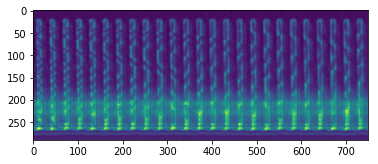

In [7]:
tplot.plot_kymograph(data['0/channel_BF'][0])

In [16]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [17]:
def f_mem(t_chunk):
    kymo = ky.chunked(input_path_prefix,output_path,fov_number,all_channels,trench_len_y,padding_y,trench_width_x,t_chunk=t_chunk)
    kymo.generate_kymograph()

In [18]:
%memit f_mem(25)

/n/groups/paulsson/Daniel/Image_analysis_pipeline/kymographs_6
/n/groups/paulsson/Daniel/Image_analysis_pipeline/kymographs_6/tempfiles_12/
peak memory: 936.98 MiB, increment: 799.95 MiB


In [19]:
%memit f_mem(10)

/n/groups/paulsson/Daniel/Image_analysis_pipeline/kymographs_6
/n/groups/paulsson/Daniel/Image_analysis_pipeline/kymographs_6/tempfiles_12/
peak memory: 677.81 MiB, increment: 533.82 MiB


In [20]:
%load_ext line_profiler

In [33]:
%timeit -n1 -r1 f_mem(25)

/n/groups/paulsson/Daniel/Image_analysis_pipeline/kymographs_6
/n/groups/paulsson/Daniel/Image_analysis_pipeline/kymographs_6/tempfiles_12/
10.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [34]:
%timeit -n1 -r1 f_mem(10)

/n/groups/paulsson/Daniel/Image_analysis_pipeline/kymographs_6
/n/groups/paulsson/Daniel/Image_analysis_pipeline/kymographs_6/tempfiles_12/
1min 44s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
